# 15.053: Gradient Search

### Step 1: What is Gradient Search? 
Try running the next cell

In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
# Explain gradient search to me 
from IPython.display import display_markdown
explanation = open('explanation.txt').read()
display_markdown(explanation, raw=True)

Gradient search, often referred to in the context of optimization, is a method used to find local minima or maxima of a function. This technique is particularly common in machine learning and artificial intelligence for training models, such as neural networks. The key concept behind gradient search is the use of gradients to guide the search process.

Here's a step-by-step explanation:

1. **Objective Function**: Gradient search is used to optimize an objective function, which is a formula that the algorithm seeks to minimize or maximize. In machine learning, this could be a loss function that measures how well a model is performing.

2. **Gradient Calculation**: The gradient of the objective function is calculated. In mathematical terms, the gradient is a vector of partial derivatives. It points in the direction of the steepest ascent of the function. For minimization problems, the opposite direction of the gradient is considered.

3. **Starting Point**: The algorithm starts with an initial guess. This is a starting point in the function's domain (like initial weights in a neural network).

4. **Iterative Process**: Gradient search proceeds iteratively. In each step, it updates the current point in the domain of the function. The update is based on the gradient calculated at the current point.

5. **Learning Rate**: The size of the step taken in the direction of the gradient is determined by a parameter known as the learning rate. A small learning rate makes the algorithm more precise but slower, whereas a large learning rate speeds up the process but can overshoot the minimum or maximum.

6. **Convergence**: The process is repeated until the algorithm converges, meaning that the changes in the function value or the changes in the variable values become very small, indicating that a local minimum or maximum is found.

7. **Challenges**: Gradient search can face challenges like getting stuck in local minima (or maxima) rather than finding the global minimum (or maximum), especially in complex, non-convex functions. Adjusting the learning rate and using advanced techniques like momentum or adaptive learning rates (like in Adam optimizer) can help alleviate some of these issues.

Gradient search is the backbone of many optimization algorithms, including the popular Gradient Descent used in machine learning. The concepts of gradient search are fundamental to understanding how algorithms make incremental improvements towards optimal solutions in various fields of computational science.

### Step 2: Visualizing gradient search--with a 1-variable function

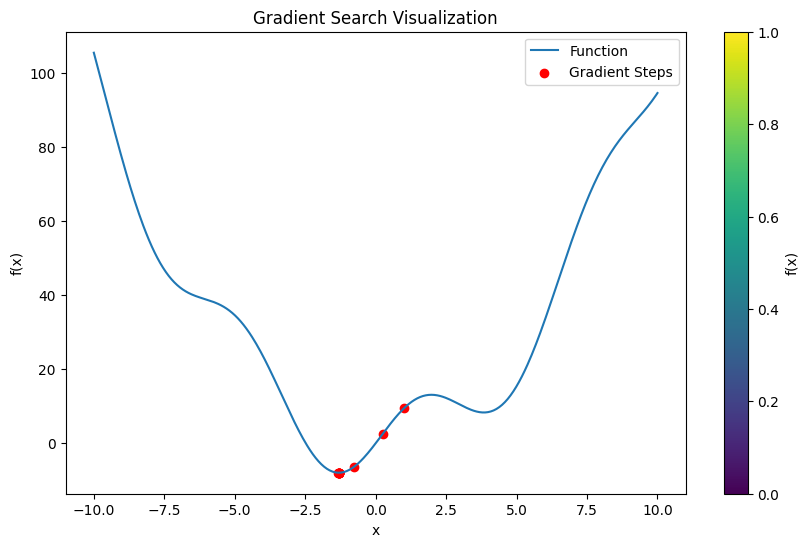

In [3]:
# Visualizing gradient search for a 1-variable function
import numpy as np
import matplotlib.pyplot as plt

def function(x):
    """ Define the function to optimize """
    return x**2 + 10*np.sin(x)

def derivative(x):
    """ Compute the derivative (gradient) of the function """
    return 2*x + 10*np.cos(x)

def gradient_search(start_x, learning_rate, n_steps):
    """ Perform gradient search """
    x = start_x
    steps = [x]
    for _ in range(n_steps):
        grad = derivative(x)
        x -= learning_rate * grad
        steps.append(x)
    return steps

# Parameters
start_x = 1.0  # Starting point
learning_rate = 0.1  # Step size -- CHANGE ME 
n_steps = 10  # Number of steps

# Perform Gradient Search
steps = gradient_search(start_x, learning_rate, n_steps)

# Create a range of x values for plotting
x_range = np.linspace(-10, 10, 400)
y_range = function(x_range)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='Function')
plt.scatter(steps, function(np.array(steps)), c='red', label='Gradient Steps')
plt.title('Gradient Search Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.colorbar(label='f(x)')
plt.legend()
plt.show()

# Add same button from Newton's Method

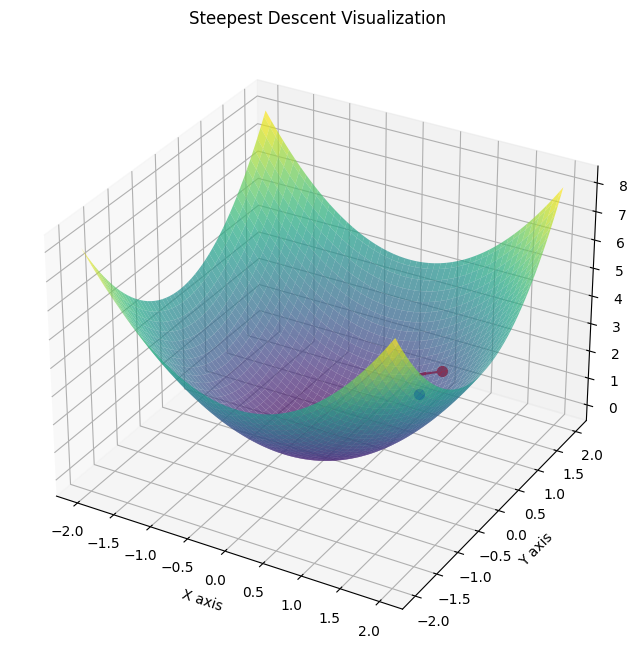

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def function(x, y):
    """ Define the 2-variable function """
    return x**2 + y**2

def gradient(x, y):
    """ Compute the gradient of the function """
    return np.array([2*x, 2*y])

# Point of interest (x0, y0)
x0, y0 = 1.0, 1.0

# Compute gradient at (x0, y0)
grad_at_x0 = gradient(x0, y0)

# Direction of steepest descent (negative of gradient)
steepest_descent = -grad_at_x0

# Step size
step_size = 0.1

# Next point after taking a step
next_point = np.array([x0, y0]) + step_size * steepest_descent

# Create a grid for plotting
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.7, cmap='viridis')

# Plot the gradient vector
ax.quiver(x0, y0, function(x0, y0), steepest_descent[0], steepest_descent[1], 0, color='red', length=0.1)

# Plot the next point
ax.scatter(*next_point, function(*next_point), color='blue', s=50)
ax.scatter(x0, y0, function(x0, y0), color='red', s=50)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('f(x, y)')
ax.set_title('Steepest Descent Visualization')
plt.show()

# Flatten the 2d function 
# Contour Lines - Adding to show direction of gradient

In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output

loop_count = 0

def increment_loop_count(_):
    global loop_count
    loop_count += 1
    update_display()

def update_display():
    with out:
        clear_output(wait=True)
        print(f"Loop count: {loop_count}")

# Create a button and display it
button = widgets.Button(description="Next Step")
button.on_click(increment_loop_count)

# Create an output widget to display the loop count
out = widgets.Output()

# Display the button and output widget
display(button, out)

# Display initial loop count
update_display()



Button(description='Next Step', style=ButtonStyle())

Output()